In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from dataset import Dataset
from model import RNNModel
from bracket_generator import encode, compute_statistics

In [2]:
def train(sess, model, dataset, training_steps):
    
    sess.run(tf.global_variables_initializer())

    losses = []

    for step in range(training_steps):

        batch_x, batch_seqlen, batch_y = sess.run(dataset.next)

        _, loss = sess.run([model.optimizer, model.loss], feed_dict={
            model.x: batch_x,
            model.seqlen: batch_seqlen,
            model.y_: batch_y
        })

        losses.append(loss)

        if step % 100 == 0:
            print('Step {step}: loss {loss}, mean_loss {mean_loss}'.format(
                step=step, loss=loss, mean_loss=np.mean(losses[-200:])))

    return losses

In [3]:
def predict_example(sess, model, string, max_len):
    encoded, l = encode(string, max_len)
    true_value = compute_statistics(string)
    
    preds = sess.run(model.y, feed_dict={
        model.x: np.asarray([encoded]),
        model.seqlen: np.asarray([l]),
    })
    
    return string, true_value, preds[0]
    

## RNN 

In [4]:
sess = tf.Session()
max_len = 50
dataset1 = Dataset(max_len=max_len)
model = RNNModel(max_len * 2)

/home/filip/.conda/envs/tf35/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [5]:
losses = train(sess, model, dataset1, 1000)
# with tf.Session() as sess:
#     tf.global_variables_initializer().run()
#     batch_x, batch_seqlen, batch_y = sess.run(dataset1.next)
#     print(batch_seqlen)

Step 0: loss 397.9716796875, mean_loss 397.9716796875
Step 100: loss 181.01014709472656, mean_loss 322.39227294921875
Step 200: loss 227.207275390625, mean_loss 246.97476196289062
Step 300: loss 172.0597686767578, mean_loss 161.09690856933594
Step 400: loss 91.3955078125, mean_loss 136.7144012451172
Step 500: loss 110.89691162109375, mean_loss 126.78064727783203
Step 600: loss 196.77149963378906, mean_loss 127.29348754882812
Step 700: loss 101.22554779052734, mean_loss 114.60778045654297
Step 800: loss 147.53480529785156, mean_loss 97.6450424194336
Step 900: loss 49.05076599121094, mean_loss 90.238525390625


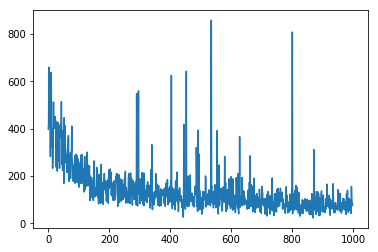

In [6]:
plt.plot(losses)
plt.show()

In [8]:
s, y_, y = predict_example(sess, model, '(()(()))(()()()(()()(()(()(()())))()()()()((())(()))(((())())()())))', max_len)
print('{s} {y_} {y}'.format(s=s, y_=y_, y=y))

(()(()))(()()()(()()(()(()(()())))()()()()((())(()))(((())())()()))) (6, 4, 59) [ 6.243778   3.1000507 39.73484  ]
